In [20]:
import pandas as pd

file_path = "/Users/ksw00/PycharmProjects/pythonProject/DSL_EDA/서울 시민의 소비 및 이동 패턴 재현 데이터.csv"

# CSV 파일을 데이터프레임으로 읽기
df = pd.read_csv(file_path, usecols= ['온라인_카드사용_건수','오프라인_카드사용_건수','평일_이동_총횟수','휴일_이동_총횟수'])
# 총 이동 횟수 계산
df['총 이동횟수'] = df['평일_이동_총횟수'] + df['휴일_이동_총횟수']
# 데이터프레임 출력
print(df)

     온라인_카드사용_건수  오프라인_카드사용_건수  평일_이동_총횟수  휴일_이동_총횟수  총 이동횟수
0             17           178        NaN        NaN     NaN
1              0            53        NaN        NaN     NaN
2              0             0        NaN        NaN     NaN
3            116           315        NaN        NaN     NaN
4              1            32       20.0        7.0    27.0
..           ...           ...        ...        ...     ...
995            0            18        NaN        NaN     NaN
996            0            39      160.0       54.0   214.0
997           19           136      150.0       29.0   179.0
998           56           152        NaN        NaN     NaN
999            9            63        NaN        NaN     NaN

[1000 rows x 5 columns]


In [21]:
df = df.dropna(subset=['총 이동횟수'])
print(df)

     온라인_카드사용_건수  오프라인_카드사용_건수  평일_이동_총횟수  휴일_이동_총횟수  총 이동횟수
4              1            32       20.0        7.0    27.0
5             18           106      110.0       42.0   152.0
10             9           120       67.0       36.0   103.0
14             0             1      110.0       44.0   154.0
16           107            13      110.0       34.0   144.0
..           ...           ...        ...        ...     ...
990           13            28       55.0       15.0    70.0
991            0             0      100.0       55.0   155.0
994          349           166      110.0        5.0   115.0
996            0            39      160.0       54.0   214.0
997           19           136      150.0       29.0   179.0

[464 rows x 5 columns]


In [22]:
total_online = df['온라인_카드사용_건수'].sum()
total_offline = df['오프라인_카드사용_건수'].sum()
print(total_online, total_offline)

11280 33102


In [23]:
# 온/오프라인 카드 사용 건수와 총 이동 횟수의 관계 분석
correlation_online = df['온라인_카드사용_건수'].corr(df['총 이동횟수'])
correlation_offline = df['오프라인_카드사용_건수'].corr(df['총 이동횟수'])

print(f"총 이동횟수와 온라인 카드 사용건수의 상관계수: {correlation_online}")
print(f"총 이동횟수와 오프라인 카드 사용건수의 상관계수: {correlation_offline}")

총 이동횟수와 온라인 카드 사용건수의 상관계수: 0.025899016170384218
총 이동횟수와 오프라인 카드 사용건수의 상관계수: 0.16813471220032852


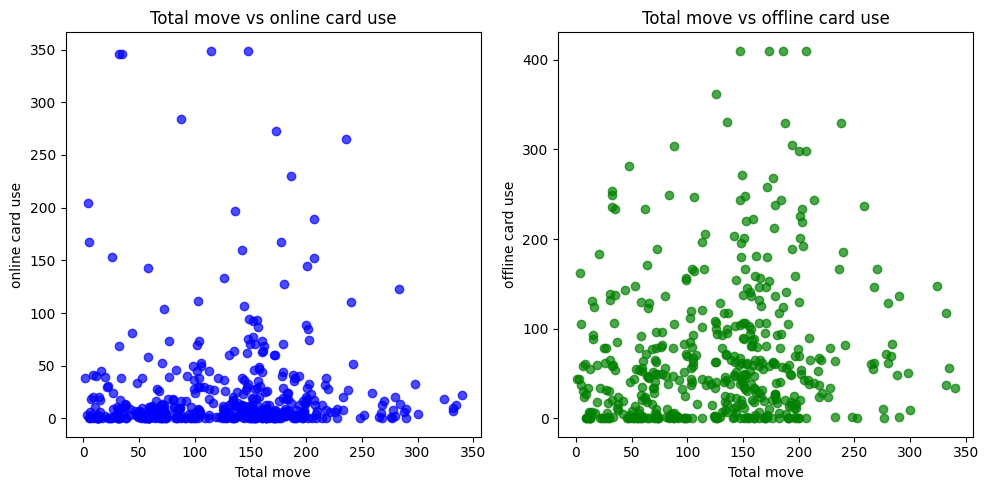

In [24]:
# 시각화를 통한 분석
import matplotlib.pyplot as plt

# 총 이동횟수와 온라인 카드 사용건수
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['총 이동횟수'], df['온라인_카드사용_건수'], alpha=0.7, c='blue')
plt.title('Total move vs online card use')
plt.xlabel('Total move')
plt.ylabel('online card use')

# 총 이동횟수와 오프라인 카드 사용건수
plt.subplot(1, 2, 2)
plt.scatter(df['총 이동횟수'], df['오프라인_카드사용_건수'], alpha=0.7, c='green')
plt.title('Total move vs offline card use')
plt.xlabel('Total move')
plt.ylabel('offline card use')

plt.tight_layout()
plt.show()